In [1]:
!pip install pykeen matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.3/739.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 27.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 10.9 MB/s eta 0:00:00
  Created wheel for rexmex: filename=rexmex-0.1.3-py3-none-any.whl size=19952 sha256=533fcfd81f6fa6de67f9c58ac3d3f5cb32c303c1f68b1235470545d77da159f1
  Stored in directory: /root/.cache/pip/wheels/13/31/9d/51fb64454e6012bc88dd72b57609646432e478ba35772736d6
Successfully built rexmex


Далее, импортируем необходимых модулей

In [2]:
import pykeen
import torch
import matplotlib.pyplot as plt
from pykeen.pipeline import pipeline
from pykeen.evaluation import ClassificationEvaluator
from pykeen.datasets import Nations,Countries

INFO:pykeen.utils:Using opt_einsum


In [3]:
# Загрузка графового датасета Nationdataset = Countries()
countries_dataset = Countries()

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [8]:
#Объявим переменные для хранения рассчитанных метрик
roc_auc_score = []
precision = []
accuracy = []
f1 = []

#Переменная для хранения рразличных пайплайнов pykeen
pipeline_results_list = []

In [9]:
evaluator = ClassificationEvaluator()

In [10]:
countries_dataset.training.mapped_triples

tensor([[  0,   0,  13],
        [  0,   0, 223],
        [  0,   1,  50],
        ...,
        [269,   1, 268],
        [270,   0,  77],
        [270,   0, 173]])

In [11]:
# Список значений количества эпох
epochs = [1,20,50,100,250]

for epoch in epochs:

  # Обучаем модель
  pipeline_results = pipeline(
      model="RotatE",
      dataset=countries_dataset,
      training_kwargs=dict(num_epochs=epoch),
      device=device
  )

  # Сохраняем обученную модель
  pipeline_results_list.append(pipeline_results)

  model = pipeline_results.model
  # Рассчитываем метрики для обученной модели и датасета Nations
  metrics = evaluator.evaluate(model, countries_dataset.testing.mapped_triples,
                             additional_filter_triples=[countries_dataset.training.mapped_triples,
                                                        countries_dataset.validation.mapped_triples])

  # Сохраняем рассчитанные метрики
  roc_auc_score.append(metrics.get_metric('roc_auc_score'))
  precision.append(metrics.get_metric('average_precision_score'))
  accuracy.append(metrics.get_metric('accuracy_score'))
  f1.append(metrics.get_metric('f1_score'))

INFO:pykeen.pipeline.api:Using device: cpu


Training epochs on cpu:   0%|          | 0/1 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/24.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.20s seconds
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/24.0 [00:00<?, ?triple/s]

/usr/local/lib/python3.10/dist-packages/rexmex/metrics/classification.py:484: RuntimeWarning: invalid value encountered in power
  pthr = (fpr**0.5) / (fpr**0.5 + tpr**0.5)
/usr/local/lib/python3.10/dist-packages/rexmex/metrics/classification.py:547: RuntimeWarning: invalid value encountered in power
  fm = (ppv * tpr) ** 0.5
INFO:pykeen.evaluation.evaluator:Evaluation took 0.16s seconds
INFO:pykeen.pipeline.api:Using device: cpu


Training epochs on cpu:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/24.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.23s seconds
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/24.0 [00:00<?, ?triple/s]

/usr/local/lib/python3.10/dist-packages/rexmex/metrics/classification.py:484: RuntimeWarning: invalid value encountered in power
  pthr = (fpr**0.5) / (fpr**0.5 + tpr**0.5)
/usr/local/lib/python3.10/dist-packages/rexmex/metrics/classification.py:547: RuntimeWarning: invalid value encountered in power
  fm = (ppv * tpr) ** 0.5
INFO:pykeen.evaluation.evaluator:Evaluation took 0.24s seconds
INFO:pykeen.pipeline.api:Using device: cpu


Training epochs on cpu:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/24.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.17s seconds
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/24.0 [00:00<?, ?triple/s]

/usr/local/lib/python3.10/dist-packages/rexmex/metrics/classification.py:484: RuntimeWarning: invalid value encountered in power
  pthr = (fpr**0.5) / (fpr**0.5 + tpr**0.5)
/usr/local/lib/python3.10/dist-packages/rexmex/metrics/classification.py:547: RuntimeWarning: invalid value encountered in power
  fm = (ppv * tpr) ** 0.5
INFO:pykeen.evaluation.evaluator:Evaluation took 0.16s seconds
INFO:pykeen.pipeline.api:Using device: cpu


Training epochs on cpu:   0%|          | 0/100 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/24.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.22s seconds
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/24.0 [00:00<?, ?triple/s]

/usr/local/lib/python3.10/dist-packages/rexmex/metrics/classification.py:484: RuntimeWarning: invalid value encountered in power
  pthr = (fpr**0.5) / (fpr**0.5 + tpr**0.5)
/usr/local/lib/python3.10/dist-packages/rexmex/metrics/classification.py:547: RuntimeWarning: invalid value encountered in power
  fm = (ppv * tpr) ** 0.5
INFO:pykeen.evaluation.evaluator:Evaluation took 0.18s seconds
INFO:pykeen.pipeline.api:Using device: cpu


Training epochs on cpu:   0%|          | 0/250 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/5 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/24.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.22s seconds
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/24.0 [00:00<?, ?triple/s]

/usr/local/lib/python3.10/dist-packages/rexmex/metrics/classification.py:484: RuntimeWarning: invalid value encountered in power
  pthr = (fpr**0.5) / (fpr**0.5 + tpr**0.5)
/usr/local/lib/python3.10/dist-packages/rexmex/metrics/classification.py:547: RuntimeWarning: invalid value encountered in power
  fm = (ppv * tpr) ** 0.5
INFO:pykeen.evaluation.evaluator:Evaluation took 0.20s seconds


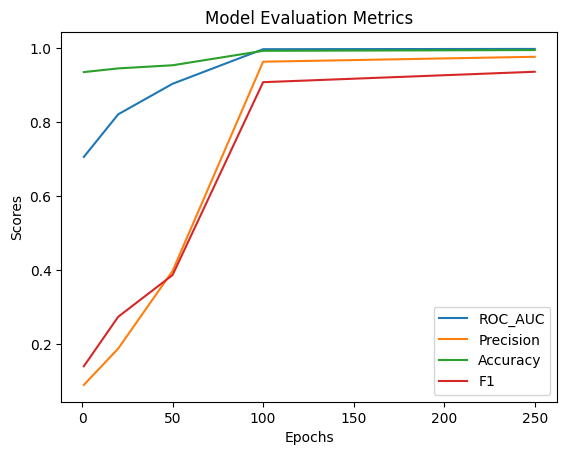

In [12]:
# В качесте лейблов используем список значений эпох
labels = epochs

# Plotting ROC AUC scores
plt.plot(labels, roc_auc_score, label='ROC_AUC')

# Plotting precision scores
plt.plot(labels, precision, label='Precision')

# Plotting accuracy scores
plt.plot(labels, accuracy, label='Accuracy')

# Plotting F1
plt.plot(labels, f1, label='F1')

# Добавляем легенду, лейблы и название
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Scores')
plt.title('Model Evaluation Metrics')

# Отрисовываем график
plt.show()


Далее рассмотрим  метод predict_target(). Основной вариант использования pykeen.predict.predict_target() — прогнозирование ссылок или прогнозирование отношений. Например, мы можем использовать наши модели для оценки всех возможных tail объектов запроса (uk, conferences, ?).

In [13]:
from pykeen.predict import predict_target
for idx, ep in enumerate(epochs):
  pipeline_result = pipeline_results_list[idx]
  pred = predict_target(
      model=pipeline_result.model,
      head="americas",
      relation="locatedin",
      triples_factory=pipeline_result.training,
  )

  pred_filtered = pred.filter_triples(countries_dataset.training)
  pred_annotated = pred_filtered.add_membership_columns(validation=countries_dataset.validation, testing=countries_dataset.testing)
  pred_df = pred_annotated.df[['tail_label','score']]
  print(f'Результат при вычислении {ep} эпох')
  print(pred_df)
  print('__________________________')

Результат при вычислении 1 эпох
           tail_label     score
119        kazakhstan -1.803230
106             india -1.831409
83      french_guiana -1.838686
35           bulgaria -1.853558
74            eritrea -1.859020
..                ...       ...
97           guernsey -2.114841
20         bangladesh -2.116246
191             qatar -2.127309
142  marshall_islands -2.137698
80               fiji -2.143314

[271 rows x 2 columns]
__________________________
Результат при вычислении 20 эпох
                 tail_label     score
1                    africa -0.976748
13                     asia -1.053876
77                   europe -1.087991
5                  americas -1.108130
194                  russia -1.136456
..                      ...       ...
219           south_georgia -2.384815
262       wallis_and_futuna -2.391801
33   british_virgin_islands -2.395152
105                 iceland -2.408721
164             new_zealand -2.455552

[271 rows x 2 columns]
____________________